In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [123]:
data_path = './FiveCitiePMData/BeijingPM20100101_20151231.csv'
df = pd.read_csv(data_path)
selected_columns = ["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation"]
weather_df = df.filter(selected_columns).dropna()
weather_df['season'] = weather_df['season'].astype('category')


# Note: PM values were measured in ug/m^3

### Dataset information

- Attribute Information:
- No: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- season: season of data in this row
- PM: PM2.5 concentration (ug/m^3)
- DEWP: Dew Point (Celsius Degree)
- TEMP: Temperature (Celsius Degree)
- HUMI: Humidity (%)
- PRES: Pressure (hPa)
- cbwd: Combined wind direction
- Iws: Cumulated wind speed (m/s)
- precipitation: hourly precipitation (mm)
- Iprec: Cumulated precipitation (mm)



In [138]:
# Describing data
weather_df.describe()

,year,month,day,hour,PM_Dongsi,HUMI,TEMP,PRES,Iws,precipitation
count,24237.000000,24237.000000,24237.00000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000
mean,2013.996452,6.532327,15.74147,11.503734,88.761027,53.295375,13.435656,1016.193155,20.483312,0.049602
std,0.804799,3.402388,8.82440,6.920483,87.378294,25.870913,11.608482,10.130609,46.015082,0.588489
min,2013.000000,1.000000,1.00000,0.000000,3.000000,2.000000,-15.000000,991.000000,0.450000,0.000000
25%,2013.000000,4.000000,8.00000,6.000000,24.000000,31.000000,3.000000,1008.000000,1.790000,0.000000
50%,2014.000000,7.000000,16.00000,12.000000,64.000000,54.000000,15.000000,1016.000000,4.920000,0.000000
75%,2015.000000,9.000000,23.00000,18.000000,124.000000,76.000000,23.000000,1024.000000,18.340000,0.000000
max,2015.000000,12.000000,31.00000,23.000000,737.000000,100.000000,40.000000,1043.000000,490.380000,30.400000


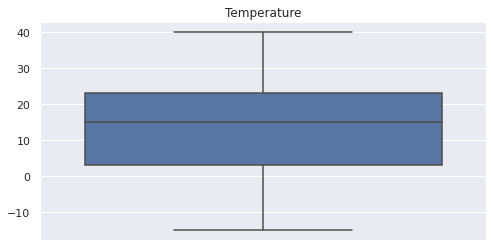

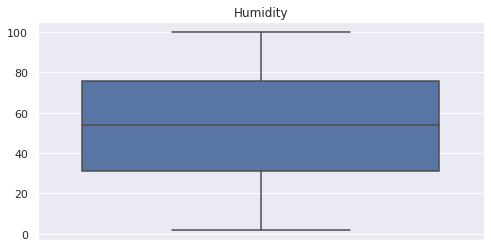

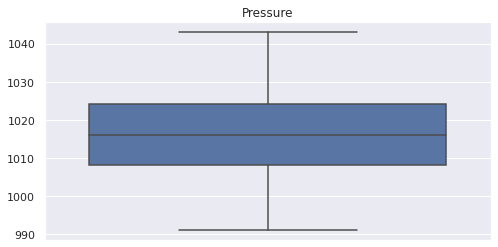

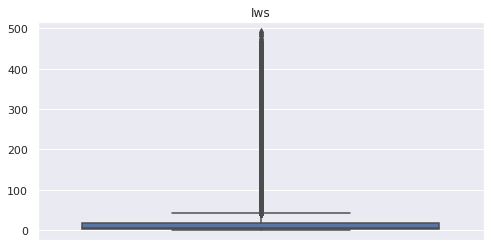

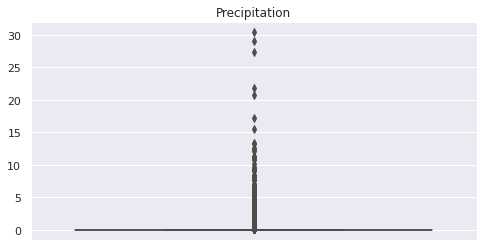

In [131]:
features =  ['TEMP', 'HUMI', 'PRES', 'Iws', 'precipitation']
titles =  ['Temperature', 'Humidity', 'Pressure', 'Iws', 'Precipitation']

sns.set(rc = {'figure.figsize':(8,4)})
def separated_boxplots(features, titles):
    for i in range(len(features)):
        chart, _ax = plt.subplots()
        feature = features[i]
        title = titles[i]
        ax = sns.boxplot(x=weather_df[[feature]], orient='v', ax=_ax)
        ax.set(title=title)

separated_boxplots(features, titles)


### Iws scatter plot

[Text(0, 0.5, 'm/s'), Text(0.5, 1.0, 'Iws (Cumulated Wind Speed (m/s))')]

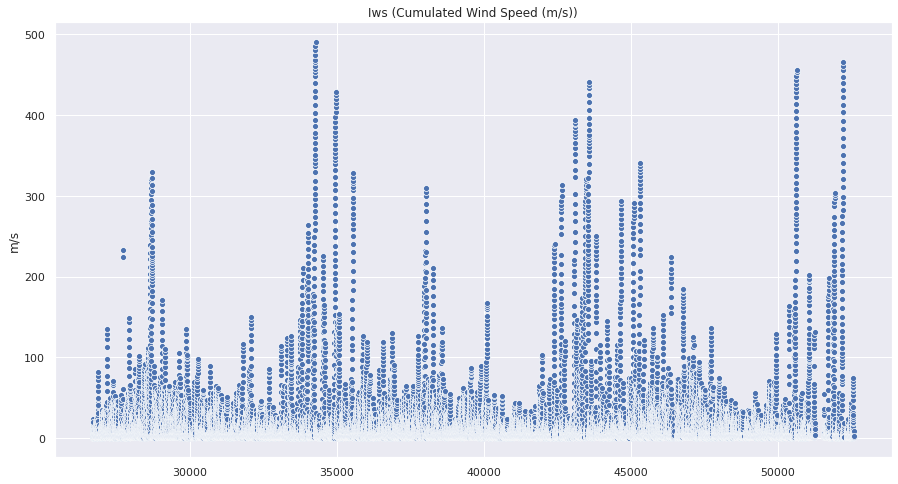

In [132]:
# weather_df['precipitation'].describe()
# sns.scatterplot(data=weather_df['precipitation'])
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(data=weather_df['Iws'])
ax.set(title='Iws (Cumulated Wind Speed (m/s))', ylabel='m/s')


### Precipitation scatter plot

[Text(0, 0.5, 'mm'), Text(0.5, 1.0, 'precipitation')]

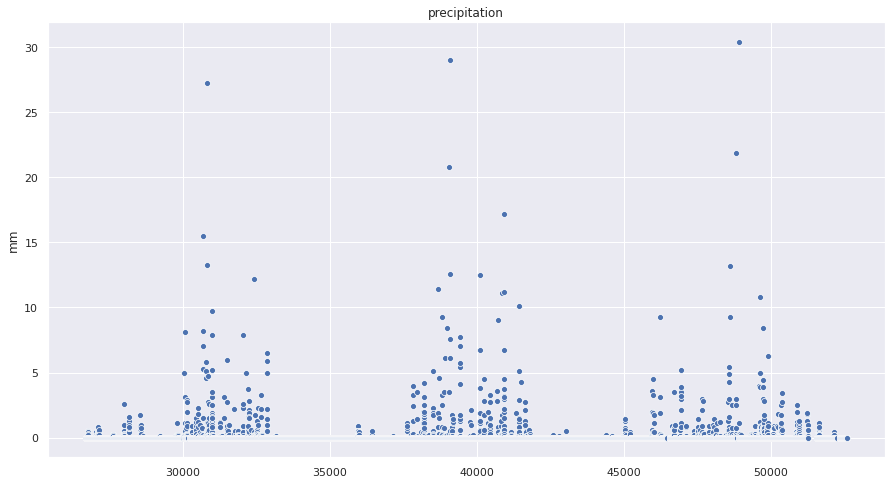

In [135]:
sns.set(rc = {'figure.figsize':(15,8)})
bx = sns.scatterplot(data=weather_df['precipitation'])
bx.set(title='precipitation', ylabel='mm')


### Describing Season

         season
count    24237
unique       4
top          1
freq      6295 



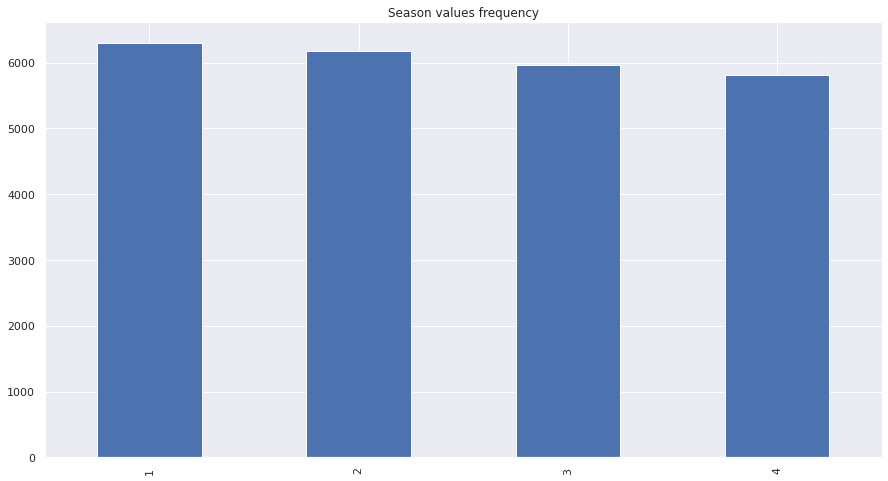

In [136]:

print('========================\n', weather_df[['season']].describe(), '\n========================\n')
weather_df['season'].value_counts().plot.bar(title='Season values frequency')

In [137]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24237 entries, 26694 to 52582
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           24237 non-null  int64   
 1   month          24237 non-null  int64   
 2   day            24237 non-null  int64   
 3   hour           24237 non-null  int64   
 4   season         24237 non-null  category
 5   PM_Dongsi      24237 non-null  float64 
 6   HUMI           24237 non-null  float64 
 7   TEMP           24237 non-null  float64 
 8   PRES           24237 non-null  float64 
 9   Iws            24237 non-null  float64 
 10  precipitation  24237 non-null  float64 
dtypes: category(1), float64(6), int64(4)
memory usage: 2.7 MB


In [140]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts(), '\n')

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count    52584.000000
mean         2.491100
std          1.116988
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64
mode:  0    1
1    2
dtype: int64
2    13248
1    13248
3    13104
4    12984
Name: season, dtype: int64 



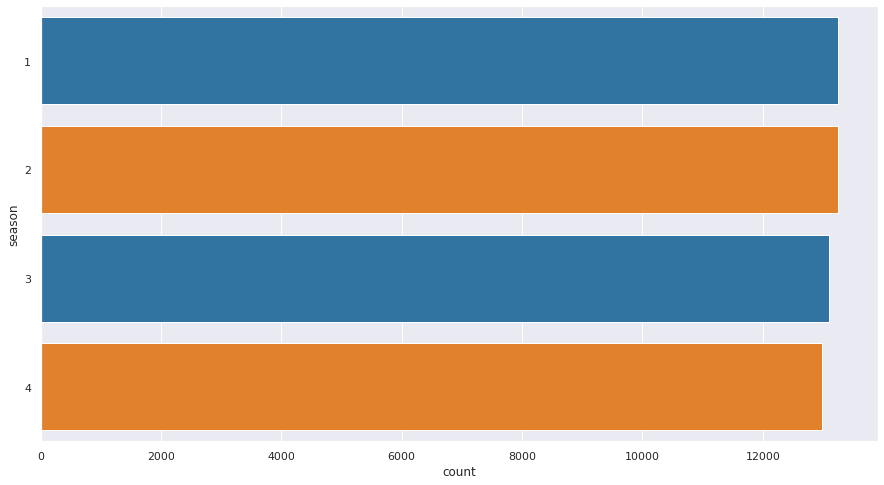

In [141]:

c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(df, y = 'season', palette=c_palette)

count    2000.000000
mean       88.052500
std        85.939517
min         3.000000
25%        24.000000
50%        64.000000
75%       122.000000
max       629.000000
Name: PM_Dongsi, dtype: float64
mode:  0    3.0
dtype: float64


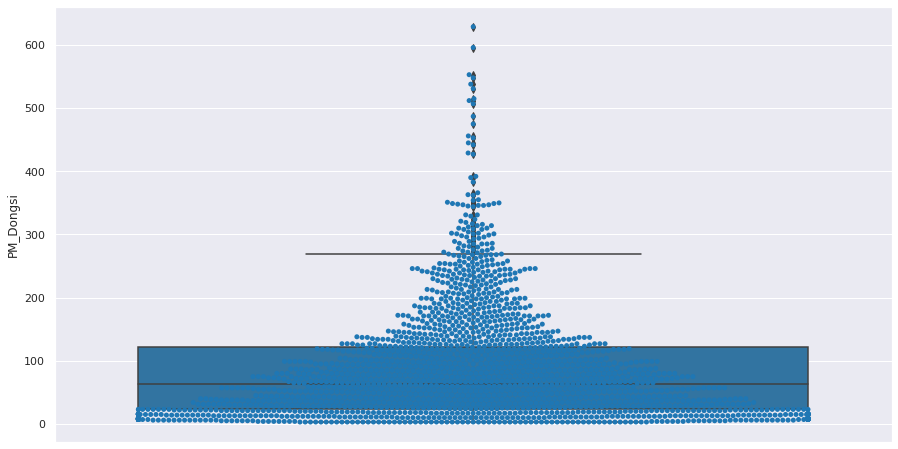

In [144]:
c_palette = ['tab:blue', 'tab:orange']

# analysis_df = df.loc[df.PM_Dongsi.notna()][["PM_Dongsi","PM_Dongsihuan","PM_Nongzhanguan","year","month","day","hour","season","HUMI","PRES","TEMP"]][:1000]
# analysis_df = df.loc[df.PM_Dongsi.notna()][selected_variables][1000:2000]

quantitative_summarized(dataframe= weather_df.sample(n=2000, random_state=1), y = 'PM_Dongsi', palette=c_palette, verbose=False, swarm=True)


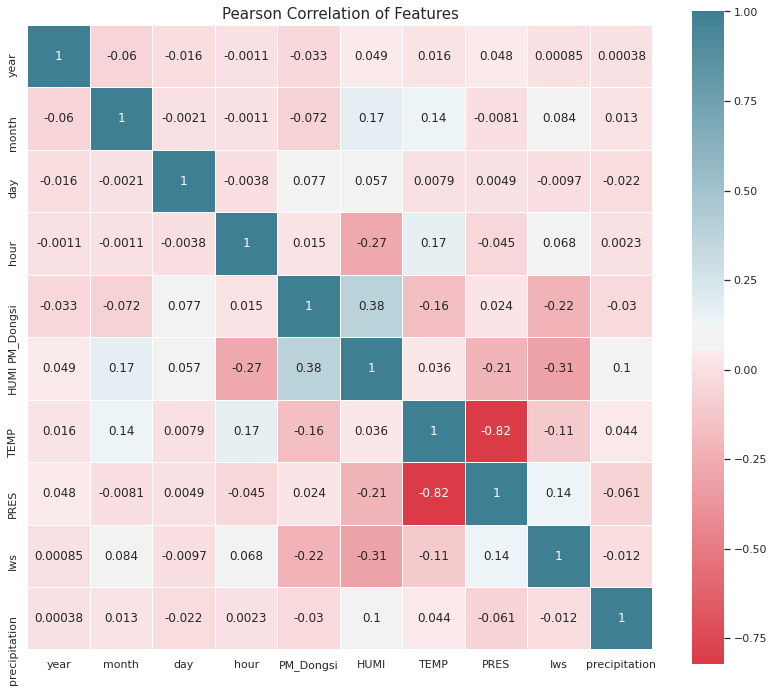

In [150]:
# df_month = df["month", "season"]
# df.loc[["month", "season"], :].head()
# corr_df = df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
# corr_df['Age'] = analysis_df['Age'].fillna(value=corr_df['Age'].mode()[0])

# df.loc[df.PM_Dongsi.notna()][:1000]
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(weather_df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })

# sns.pairplot(data=analysis_df)
plt.show()

## Testing models

- SVM (SVR)
- RF (Random Forest)

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import datetime as dt

selected_variables = ["year","month","day","hour","season","PM_Dongsi","HUMI","TEMP","PRES","Iws","precipitation","datetime"] 
# analysis_df = df.loc[df.PM_Dongsi.notna()][["PM_Dongsi","PM_Dongsihuan","PM_Nongzhanguan","year","month","day","hour","season","HUMI","PRES","TEMP"]][:1000]

train_df = df.loc[df.PM_Dongsi.notna()][selected_variables]
train_df = train_df.loc[train_df.precipitation.notna()]
train_df = train_df.loc[train_df.HUMI.notna()]
train_df = train_df.loc[train_df.TEMP.notna()]
train_df = train_df.loc[train_df.PRES.notna()]

train_df.describe()
# print("precipitation", train_df["precipitation"].hasnans)
# print("HUMI", train_df["HUMI"].hasnans)
# print("TEMP", train_df["TEMP"].hasnans)
# print("PRES", train_df["PRES"].hasnans)

# train_df["precipitation"].hasnans

# y = train_df["PM_Dongsi"]
# X = train_df[["season","HUMI","TEMP","PRES","Iws","precipitation"]]

# X['datetime'] = X['datetime'].map(X['datetime'].toordinal)
# X['datetime'] = X['datetime'].map(dt.datetime.toordinal)


,year,month,day,hour,season,PM_Dongsi,HUMI,TEMP,PRES,Iws,precipitation
count,24237.000000,24237.000000,24237.00000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000,24237.000000
mean,2013.996452,6.532327,15.74147,11.503734,2.465198,88.761027,53.295375,13.435656,1016.193155,20.483312,0.049602
std,0.804799,3.402388,8.82440,6.920483,1.116758,87.378294,25.870913,11.608482,10.130609,46.015082,0.588489
min,2013.000000,1.000000,1.00000,0.000000,1.000000,3.000000,2.000000,-15.000000,991.000000,0.450000,0.000000
25%,2013.000000,4.000000,8.00000,6.000000,1.000000,24.000000,31.000000,3.000000,1008.000000,1.790000,0.000000
50%,2014.000000,7.000000,16.00000,12.000000,2.000000,64.000000,54.000000,15.000000,1016.000000,4.920000,0.000000
75%,2015.000000,9.000000,23.00000,18.000000,3.000000,124.000000,76.000000,23.000000,1024.000000,18.340000,0.000000
max,2015.000000,12.000000,31.00000,23.000000,4.000000,737.000000,100.000000,40.000000,1043.000000,490.380000,30.400000


In [131]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

y = train_df["PM_Dongsi"]
X = train_df[["season","HUMI","TEMP","PRES","Iws","precipitation"]]

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svr', SVR(epsilon=0.2))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
# regr.predict([X], y)

regr.predict()


In [5]:
# My version of the code at this blog post:
# https://towardsdatascience.com/automl-a-tool-to-improve-your-workflow-1a132248371f

import h2o
from h2o.automl import H2OAutoML

h2o.init()

train = h2o.import_file(data_path)
y = 'PM_Dongsi' #"C1" #e = edible, p = poisonous

# Train AutoML for 10 mins
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(y=y, training_frame=train)

# Look at Leaderboard (will have more or fewer models, depending on the hardware used)
aml.leaderboard

# model_id                                               auc      logloss    mean_per_class_error         rmse          mse
# ---------------------------------------------------  -----  -----------  ----------------------  -----------  -----------
# StackedEnsemble_BestOfFamily_AutoML_20190612_161331      1  0.00136702                        0  0.00144618   2.09143e-06
# XGBoost_grid_1_AutoML_20190612_161331_model_4            1  0.000613344                       0  0.00231538   5.361e-06
# GBM_5_AutoML_20190612_161331                             1  1.46072e-13                       0  1.62172e-12  2.62997e-24
# GBM_3_AutoML_20190612_161331                             1  1.07278e-16                       0  6.88271e-15  4.73717e-29
# GBM_grid_1_AutoML_20190612_161331_model_1                1  0.000462979                       0  0.000671548  4.50977e-07
# StackedEnsemble_AllModels_AutoML_20190612_161331         1  0.000839458                       0  0.000880344  7.75006e-07
# GBM_2_AutoML_20190612_161331                             1  2.06903e-17                       0  1.05991e-15  1.1234e-30
# XGBoost_grid_1_AutoML_20190612_161331_model_1            1  0.000164531                       0  0.000872258  7.60834e-07
# XGBoost_1_AutoML_20190612_161331                         1  0.00210774                        0  0.0085784    7.3589e-05
# DeepLearning_grid_1_AutoML_20190612_161331_model_2       1  0.000968467                       0  0.0167997    0.00028223
# 
# [26 rows x 6 columns]



# Or if you want to evaluate performance on a test set instead of using leaderboard metrics,
# you can create a test set and do the following:

# df = h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# y = "C1" #e = edible, p = poisonous
# train, test = df.split_frame(ratios=[.8])
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(y=y, training_frame=train)
# perf = aml.leader.model_performance(test)
# print(perf)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/anargu/.pyenv/versions/3.8.0/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkhghmu28
  JVM stdout: /tmp/tmpkhghmu28/h2o_anargu_started_from_python.out
  JVM stderr: /tmp/tmpkhghmu28/h2o_anargu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_anargu_qbxhbx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.908 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
20:57:30.871: XGBoost_1_AutoML_20210621_205729 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


█
20:57:31.874: XGBoost_2_AutoML_20210621_205729 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.



20:57:32.880: XGBoost_3_AutoML_20210621_205729 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_20210621_205729_cv_1.  Details: ERRR on field: _response_column: Response 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210621_205729,261.809,16.1805,261.809,9.06855,nan
StackedEnsemble_BestOfFamily_AutoML_20210621_205729,261.869,16.1824,261.869,9.12154,nan
GBM_grid__1_AutoML_20210621_205729_model_2,268.412,16.3833,268.412,9.47859,nan
GBM_4_AutoML_20210621_205729,284.323,16.8619,284.323,9.36936,nan
GBM_3_AutoML_20210621_205729,286.096,16.9144,286.096,9.48308,nan
GBM_1_AutoML_20210621_205729,288.101,16.9735,288.101,9.6941,nan
GBM_2_AutoML_20210621_205729,292.159,17.0927,292.159,9.72491,nan
XRT_1_AutoML_20210621_205729,299.025,17.2923,299.025,9.75676,0.284344
DRF_1_AutoML_20210621_205729,313.11,17.6949,313.11,9.95203,0.287956
GBM_grid__1_AutoML_20210621_205729_model_3,339.827,18.4344,339.827,10.1437,nan
